## Gráficos

En la clase de hoy haremos una introducción a la creación de gráficos con dos librerías: matplotlib y seaborn. La librería matplotlib está conformada por diversos módulos. De todos ellos nos interesa trabajar con pyplot, el cual contiene las funciones básicas para generar gráficos. 

#### Matplotlib y Seaborn.
 
[Matplotlib](https://matplotlib.org/) es una de las principales librerías a la hora de graficar datos. Con esta se pueden realizar gráficos de barra, gráficos de línea, histogramas, gráficos de dispersión, mapas de calor, y otras visualizaciones. Incluso nos permite combinar diferentes tipos de visualización. Todo esto permitiendo editar los colores, fuentes, texto, etc. 
 
Por su parte [Seaborn](https://seaborn.pydata.org/) es una libreria que une lo mejor de Matplotlib y Pandas, permitiendo crear, de forma muy sencilla gráficos de Matplotlib partiendo del uso de Data Frames de Pandas. Seaborn también tiene una [hoja de trucos](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf) muy útil. 
 


Text(0.5, 1.0, 'asd')

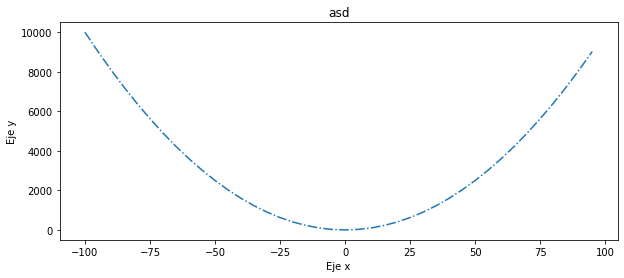

In [17]:
import matplotlib.pyplot as plt 
import numpy as np
import math

x = np.array(range(-100,100,5))
y = x**2

fig, ax = plt.subplots(figsize = (10,4))
ax.plot(x,y,"-.")
ax.set_xlabel("Eje x")
ax.set_ylabel("Eje y")
ax.set_title("asd")

In [9]:
#importamos las librerias que utilizaremos
import pandas as pd
import matplotlib.pyplot as plt   # Solo importamos el módulo pyplot. se podría hacer "from matplotlib import pyplot as plt"
import seaborn as sns

La librería Seaborn permite cargar Dataset incluídos en ella. En este caso utilizaremos un dataset de exoplanetas que se han descubierto hasta 2014 extraído de https://exoplanets.nasa.gov/discovery/exoplanet-catalog/

In [10]:
data_planets = sns.load_dataset('planets')
data_planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [12]:
print(data_planets.shape)

(1035, 6)


#### Countplot

Ahora realizaremos un gráfico de barras que permite visualizar la cantidad de registros por determinada columna.  
En este caso realizaremos un gráfico de la cantidad de planetas por cada método de descubrimiento.
[Ver documentación countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplotde)

Primero realizaremos *value_counts()* para conocer los valores

In [ ]:
data_planets["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


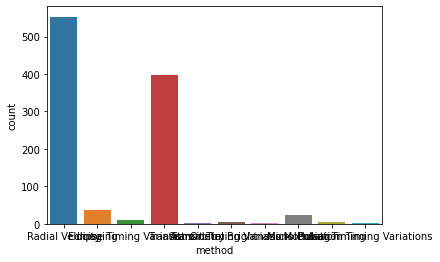

In [ ]:
sns.countplot(data_planets["method"]);

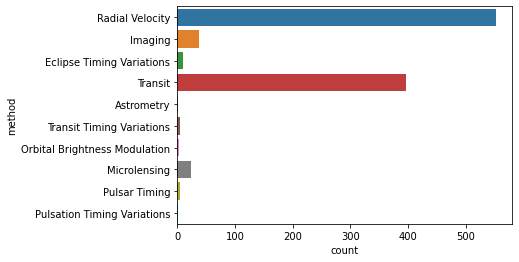

In [ ]:
# para cambiar el eje x y que se vea correctamente

sns.countplot(y=data_planets["method"])

#### Barplot

Ahora realizaremos un barplot de la librería Seaborn. 

Esto es un gráfico de barras con la cantidad de cada tipo, realizaremos un gráfico similar al anterior pero de la cantidad de planetas descubiertos en cada año. Para esto primero realizaremos una agrupación por año y la utilizaremos esta agrupación para realizar el gráfico.

[Ver Documentación barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)


In [ ]:
lista1 = []
lista2 = []
diccionario = {zip(lista1,lista2)}
data = pd.DataFrame(diccionario)

In [ ]:
# Realizamos la agrupación a través de la columna "encuentro_anio"

data_agrupada = data_planets.groupby("year")

In [ ]:
# Generamos el dato de la cantidad de encuentros sobre la agrupación (se cuenta year pero podria ser sobre cualquiera)

data_para_grafico = data_agrupada["year"].count()
data_para_grafico

year
1989      1
1992      2
1994      1
1995      1
1996      6
1997      1
1998      5
1999     15
2000     16
2001     12
2002     32
2003     25
2004     26
2005     39
2006     31
2007     53
2008     74
2009     98
2010    102
2011    185
2012    140
2013    118
2014     52
Name: year, dtype: int64

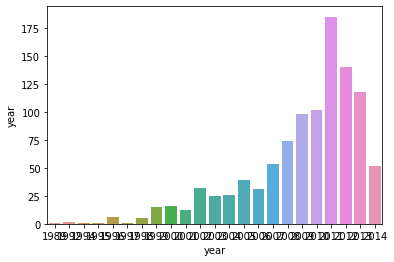

In [ ]:
sns.barplot(x=data_para_grafico.index, y=data_para_grafico)    #Index es el índice, en este caso el año de descubrimiento


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

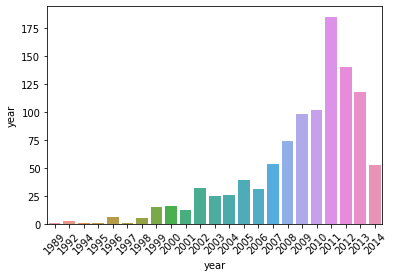

In [ ]:
# Cambiaremos la rotación de la etiquetas del eje X con plt.xticks

sns.barplot(x=data_para_grafico.index, y=data_para_grafico)    #Index es el índice, en este caso el año de descubrimiento
plt.xticks(rotation=45)


#### Displot

Este gráfico sirve para ver distribuciones de variables numéricas, en este caso vamos a ver la masa de los exoplanetas.

[Ver Documentación displot](https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot)

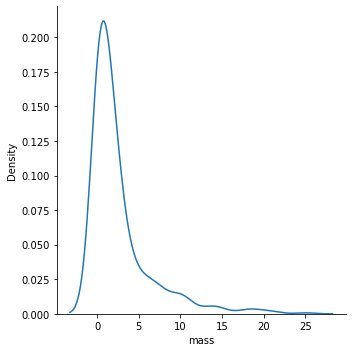

In [13]:
sns.displot(data=data_planets, x="mass",kind="kde")


#### Scatterplot

Otro gráfico que se puede realizr es Scatterplot que grafica puntos en dos ejes XY, en este caso cada punto será un planeta y gráficaremos *mass* y *distance* para ver si podemos ver una relación.

[Ver Documentación scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot)

<AxesSubplot:xlabel='distance', ylabel='mass'>

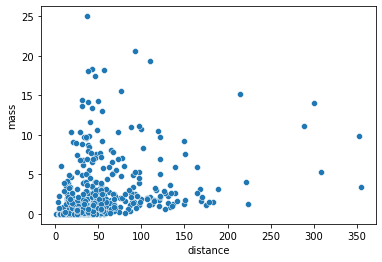

In [16]:
data_planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


<AxesSubplot:xlabel='x', ylabel='y'>

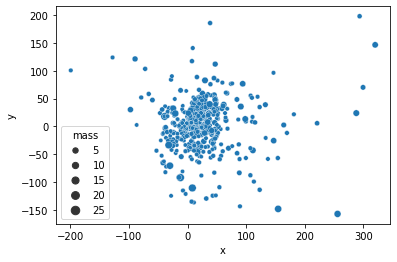

In [37]:
planetdirection=(1/data_planets["orbital_period"])*1000
data_planets["x"]=list(map(lambda p,q:math.sin(q)*p,data_planets["distance"], planetdirection)   )

data_planets["y"]=list(map(lambda p,q:math.cos(q)*p,data_planets["distance"], planetdirection)   )

sns.scatterplot(data=data_planets, x="x", y="y", size="mass")
